In [100]:
#importing all necessary packages. 
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
plt.rcParams['figure.figsize'] = (12.0,8.0)
plt.rcParams['figure.constrained_layout.use']= True
plt.rc('font',size=10)

In [101]:
#plot_the_import_dataset_Wee2.csv and rename the column values.
df = pd.read_csv('Week3.csv',header = None,skiprows =1)
df.columns=['X1','X2','Y']
#check data are imported correctly or not
df.shape



(199, 3)

In [102]:
#Assign each column Values:
X1=df.iloc[:,0]
X2=df.iloc[:,1]
X=np.column_stack((X1,X2))
y=df.iloc[:,2]

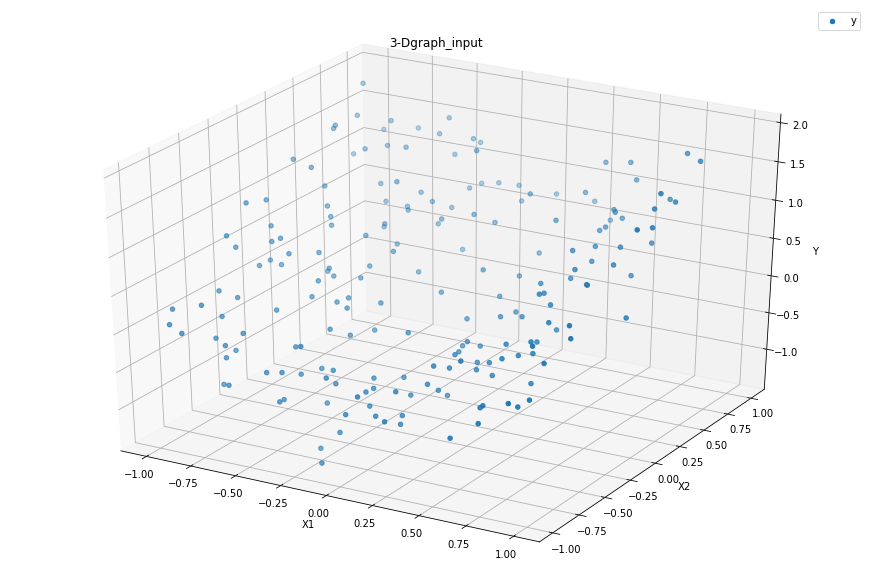

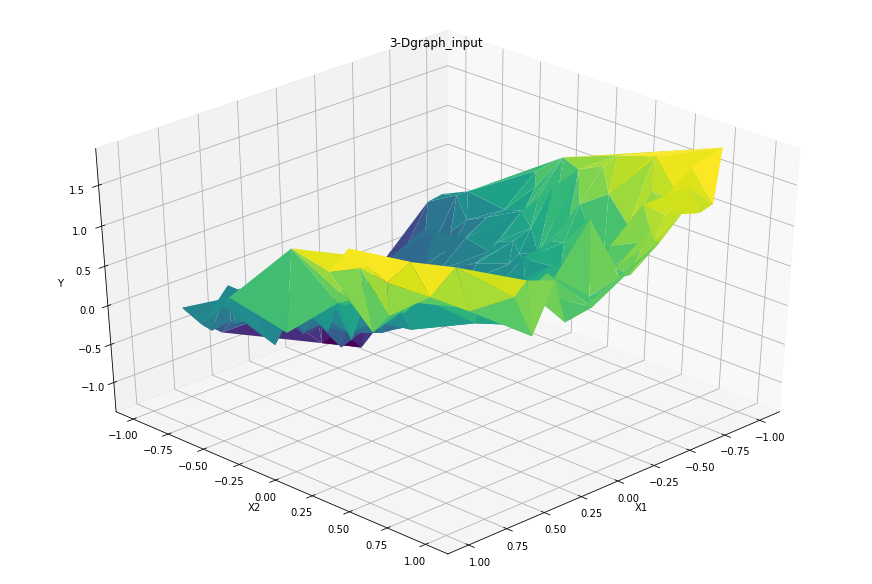

In [103]:
#plotting the given graph by taking x1  x2 as input and Y as output in 3d scatter/surface plot.
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(X[:,0],X[:,1],y)
ax.set_ylabel('X2')
ax.set_xlabel('X1')
ax.set_zlabel('Y')
ax.set_title('3-Dgraph_input')
ax.legend('y')
plt.show()
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot_trisurf(X1, X2, y,cmap=plt.cm.viridis, linewidth=0.2)
ax.view_init(35, 45)
ax.set_ylabel('X2')
ax.set_xlabel('X1')
ax.set_zlabel('Y')
ax.set_title('3-Dgraph_input')
plt.show()





In [104]:
#adding features to the dataset using polynomial feature function.
from sklearn.preprocessing import PolynomialFeatures
Xpoly = PolynomialFeatures(5).fit_transform(X)
print(Xpoly.shape)
print(y.shape)



(199, 21)
(199,)


In [105]:
#declaring Lasso function
from sklearn.linear_model import Lasso
Ci_range = [0.5, 0.01, 0.005, 5, 10, 50, 100,1000]
for Ci in Ci_range:
    lasso = Lasso(alpha=1/(2*Ci))
    lasso.fit(Xpoly, y)
    intercept_= lasso.intercept_
    coef_=lasso.coef_
    ypred=lasso.predict(Xpoly)
    MSE=mean_squared_error(y,ypred)
    print("for_Ci={}\n intercept_={}\n coef_={}\n M.S.E={}\n".format(Ci,intercept_,coef_,MSE))
   






for_Ci=0.5
 intercept_=0.3203281701467309
 coef_=[ 0. -0.  0.  0. -0. -0. -0.  0. -0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
  0. -0.  0.]
 M.S.E=0.4523842174506722

for_Ci=0.01
 intercept_=0.3203281701467309
 coef_=[ 0. -0.  0.  0. -0. -0. -0.  0. -0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
  0. -0.  0.]
 M.S.E=0.4523842174506722

for_Ci=0.005
 intercept_=0.3203281701467309
 coef_=[ 0. -0.  0.  0. -0. -0. -0.  0. -0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
  0. -0.  0.]
 M.S.E=0.4523842174506722

for_Ci=5
 intercept_=0.3512885747520754
 coef_=[ 0.         -0.          0.66534779  0.         -0.         -0.
 -0.          0.         -0.          0.          0.          0.
  0.         -0.         -0.         -0.          0.         -0.
  0.         -0.          0.        ]
 M.S.E=0.1691787852011525

for_Ci=10
 intercept_=0.18539882955013687
 coef_=[ 0.         -0.          0.81224158  0.49574664 -0.         -0.
 -0.          0.         -0.          0.          0.          0.
  0.         -0.      

In [106]:
#generating unknown values for the input dataset
Xtest=[]
grid1 = np.linspace(-2,2,num=y.size)
grid2 = np.linspace(-1.5,1.5,num=y.size)
Xtest = np.column_stack((grid1,grid2))
X1_test,Y1_test = np.meshgrid(grid1,grid2)
#adding features to the dataset using polynomial function.
Xtestpoly = PolynomialFeatures(5).fit_transform(Xtest)
print(Xtest.shape)
print(Xtestpoly.shape)
print(y.shape)


(199, 2)
(199, 21)
(199,)


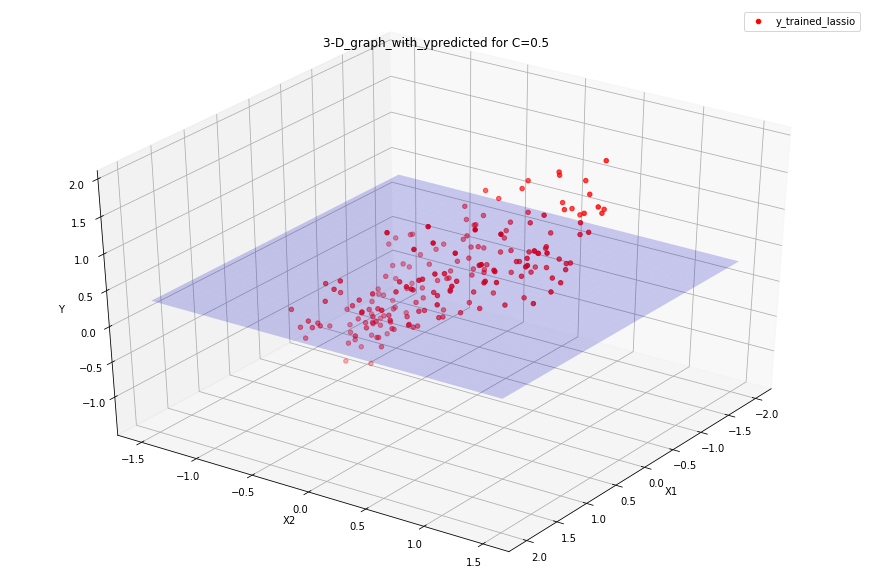

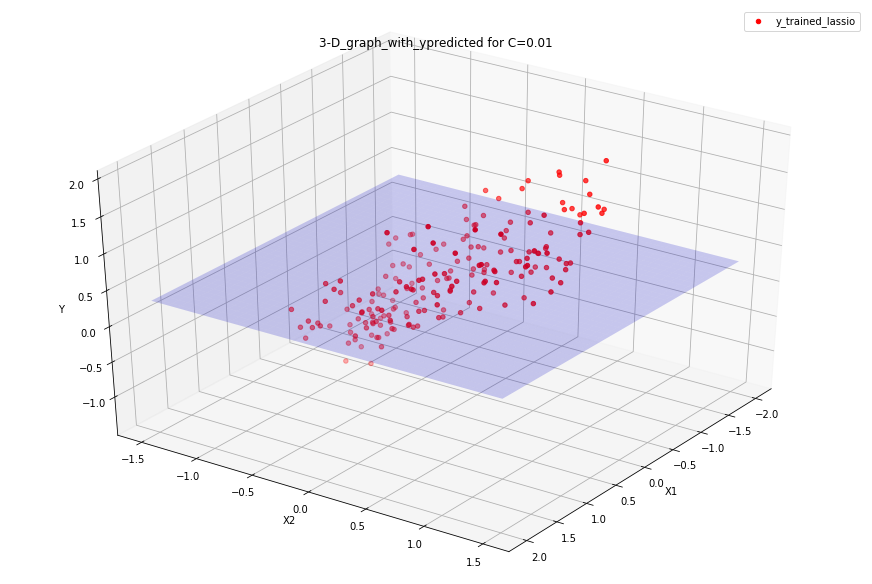

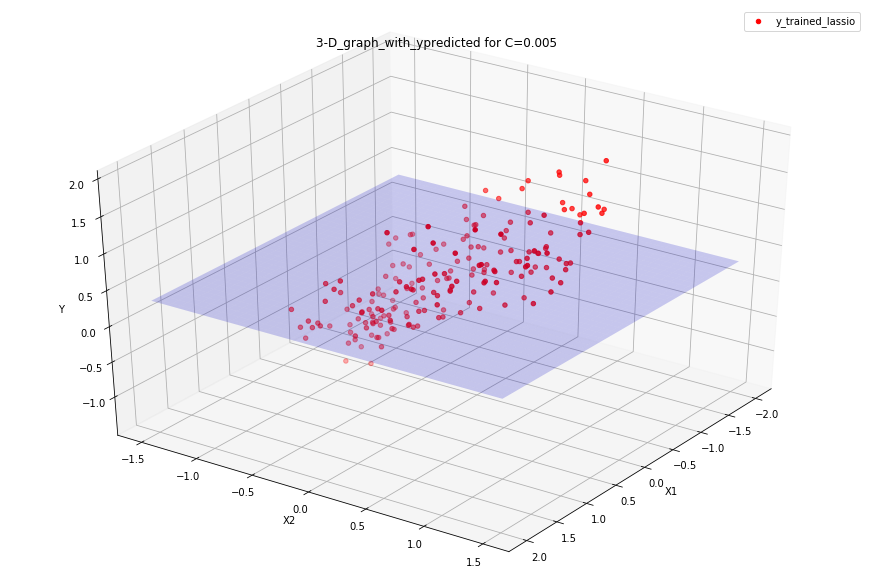

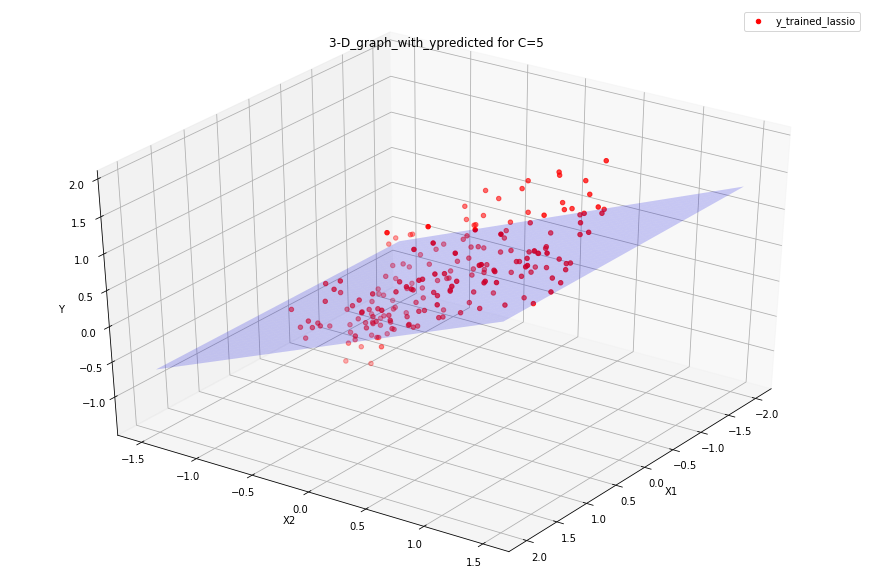

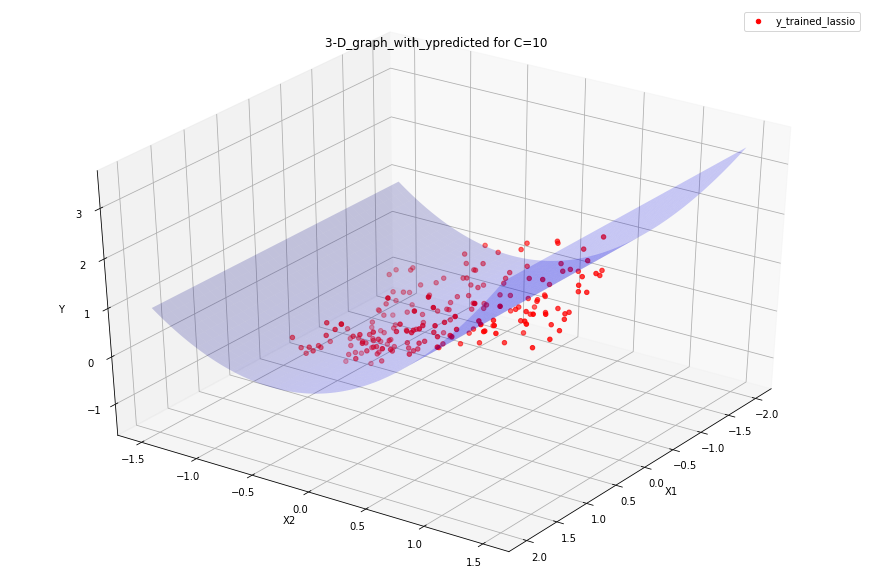

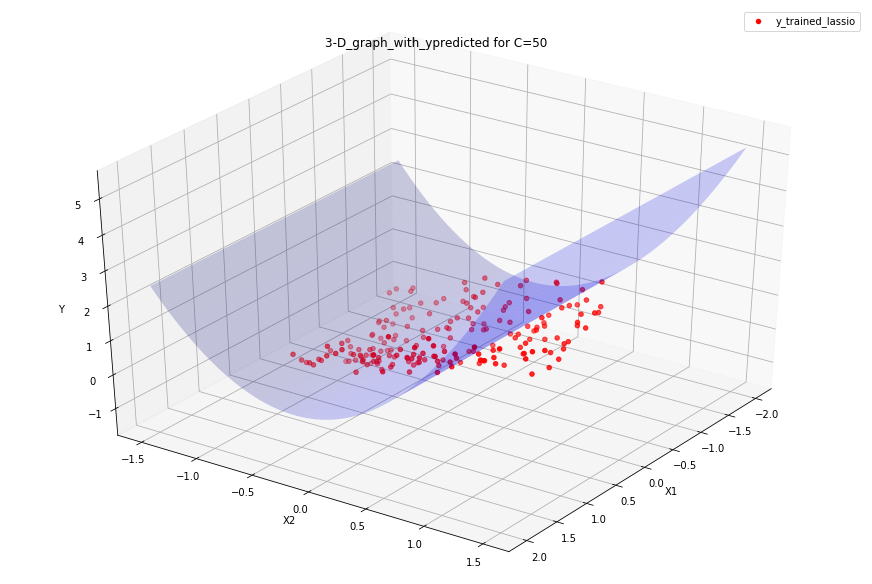

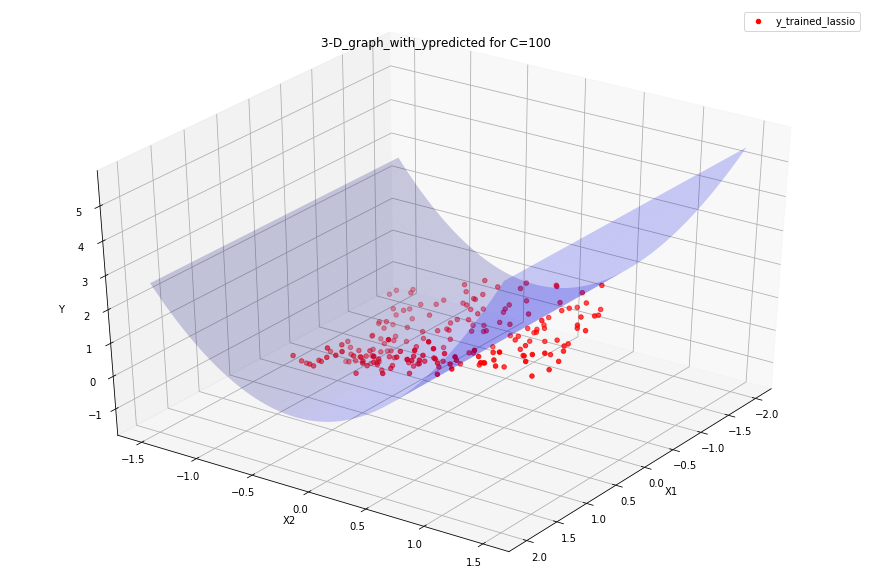

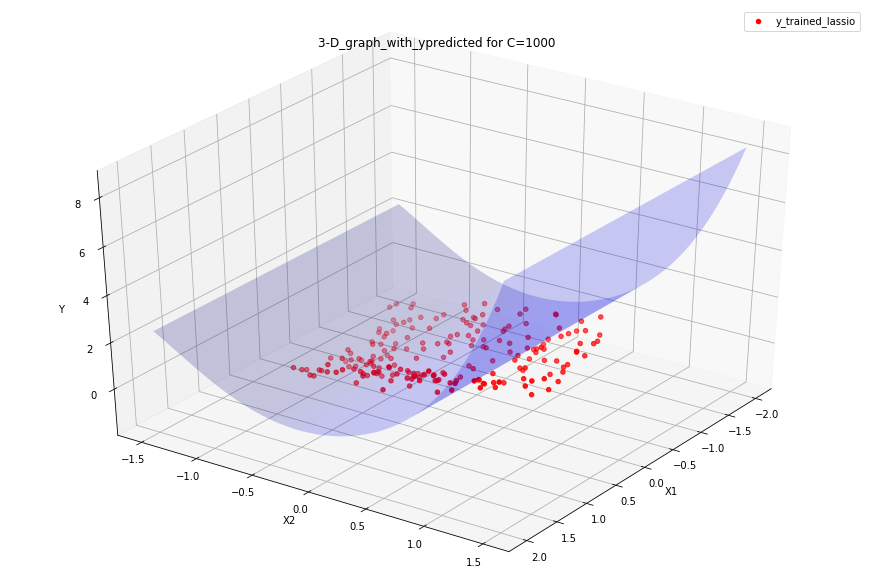

In [107]:

#performing lasson on test data.
for Ci in Ci_range:
    lasso1 = Lasso(alpha=1/(2*Ci))
    lasso1.fit(Xpoly, y)
    ypred_test=lasso1.predict(Xtestpoly)
    ypred_test=pd.DataFrame(ypred_test)
    #plotting the given graph
    fig = plt.figure()
    ax = fig.add_subplot(111,projection='3d')
    y_trained_lassio = ax.scatter(X[:,0],X[:,1],y,color='red')
    ax.legend(['y_trained_lassio'])
    surf = ax.plot_surface(X1_test, Y1_test, ypred_test,
                        rstride=5, cstride=5,
                        color='blue',
                        alpha=0.2,
                        linewidth=0.2
                          )
    ax.view_init(35, 35)
    ax.set_ylabel('X2')
    ax.set_xlabel('X1')
    ax.set_zlabel('Y')
    ax.set_title('3-D_graph_with_ypredicted for C={}'.format(Ci))
    plt.show()
    
 

In [108]:
#declaring Ridge function
from sklearn.linear_model import Ridge
Ci_range_r = [0.5, 0.01, 0.005, 5, 10, 50, 100]
for Ci in Ci_range_r:
    ridge = Ridge(alpha=1/(2*Ci))
    ridge.fit(Xpoly, y)
    intercept_= ridge.intercept_
    coef_=ridge.coef_
    ypred_r=ridge.predict(Xpoly)
    MSE=mean_squared_error(y,ypred_r)
    print("for_Ci={}\n intercept_={}\n coef_={}\n M.S.E={}\n".format(Ci,intercept_,coef_,MSE))

for_Ci=0.5
 intercept_=0.03028298046660277
 coef_=[ 0.         -0.04955551  0.86191089  0.7593126  -0.08332696 -0.00090103
  0.00349913  0.1041164   0.04838807  0.12484657  0.30462318  0.1094943
  0.07065643  0.03622    -0.01328243  0.01246938  0.05658441  0.08065643
 -0.10264313 -0.04364789 -0.02701731]
 M.S.E=0.0402120088872006

for_Ci=0.01
 intercept_=0.22590318182596397
 coef_=[ 0.         -0.02784772  0.41948107  0.23191044 -0.01702682 -0.02324304
 -0.01866172  0.1041499  -0.00792216  0.20511944  0.19330772  0.00303554
  0.06053432 -0.0151111  -0.01259728 -0.01466479  0.05474825 -0.01031872
  0.04366897 -0.00785891  0.12527716]
 M.S.E=0.11664563092059964

for_Ci=0.005
 intercept_=0.2654287108553201
 coef_=[ 0.         -0.02494402  0.31045302  0.1426838  -0.01775717 -0.01575334
 -0.01696544  0.08314035 -0.00775336  0.16438433  0.12013331 -0.00323036
  0.03587151 -0.01517183 -0.00813192 -0.01300859  0.04517199 -0.00834915
  0.04029514 -0.00610389  0.10697138]
 M.S.E=0.17467936073158

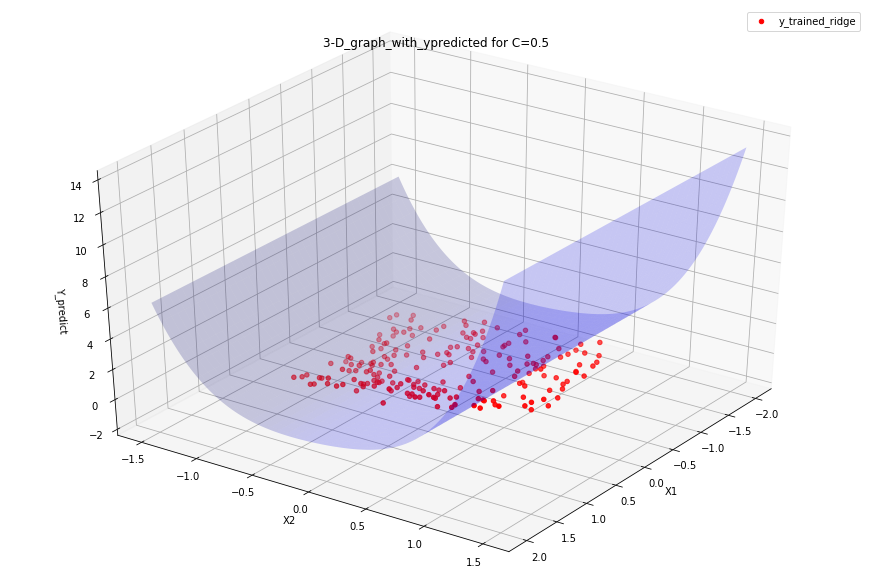

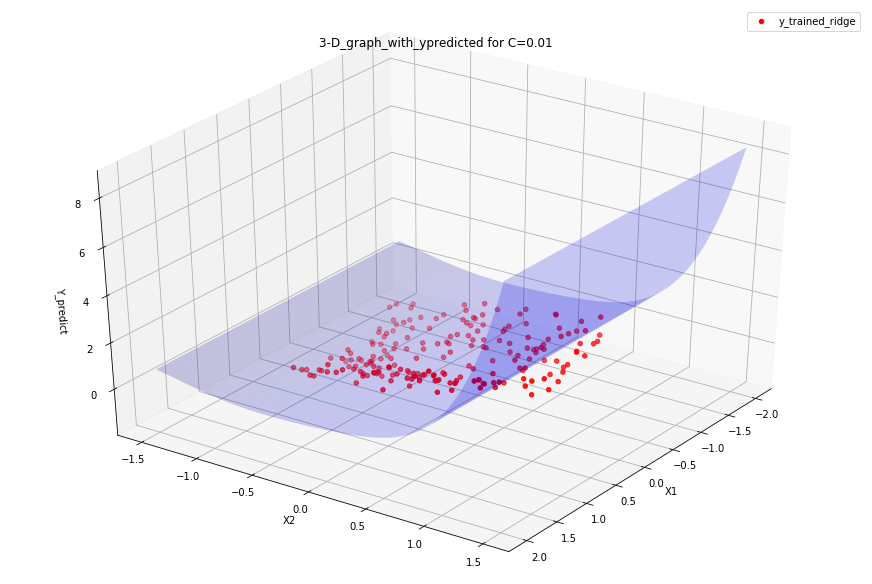

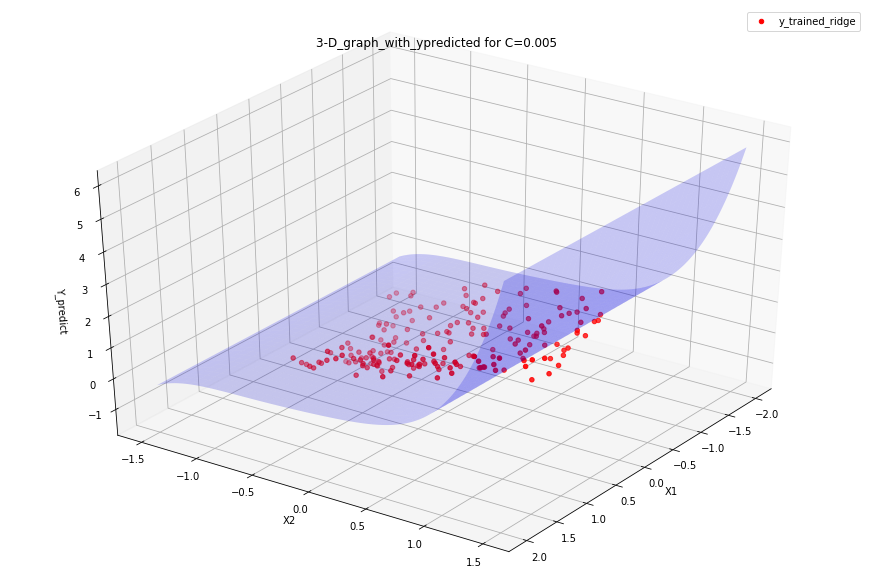

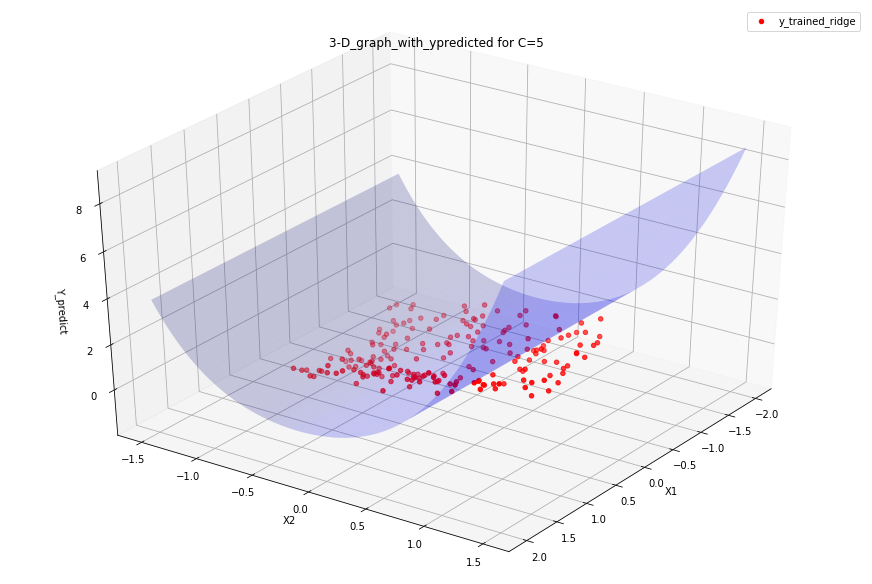

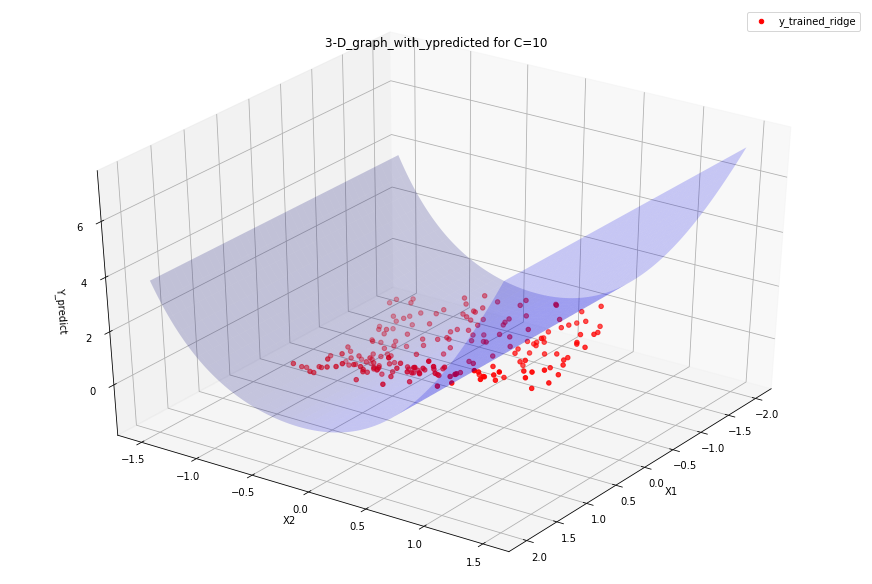

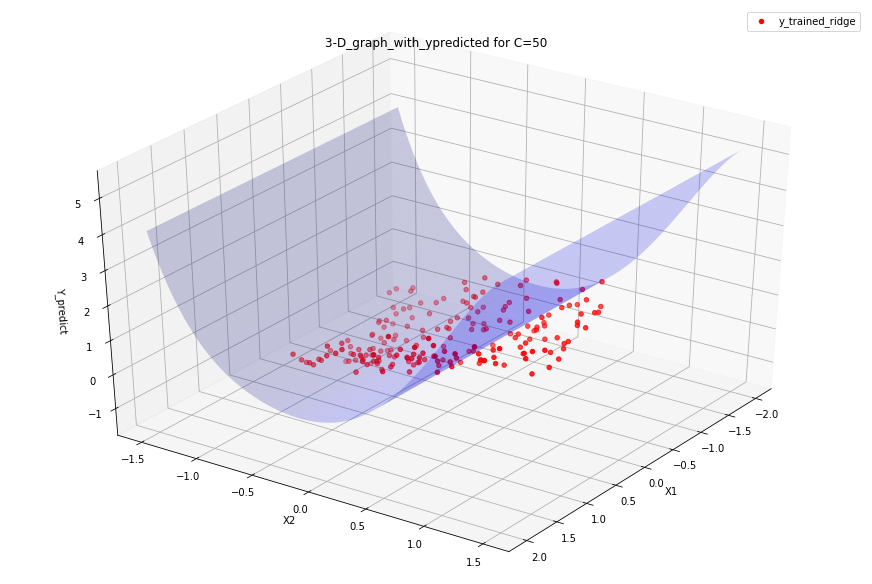

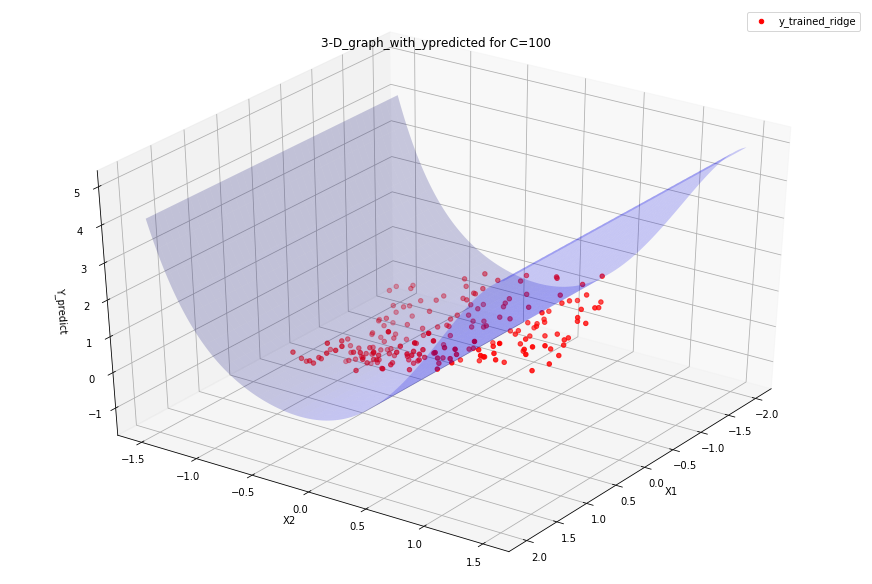

In [110]:
for Ci in Ci_range_r:
    ridge_1 = Ridge(alpha=1/(2*Ci))
    ridge_1.fit(Xpoly, y)
    ypred_test_r=ridge_1.predict(Xtestpoly)
    ypred_test_r=pd.DataFrame(ypred_test_r)
    #plotting the given graph
    from mpl_toolkits import mplot3d
    fig = plt.figure()
    ax = fig.add_subplot(111,projection='3d')
    y_trained_ridge = ax.scatter(X[:,0],X[:,1],y,color='red')
    ax.legend([y_trained_ridge], ['y_trained_ridge'])
    surf = ax.plot_surface(X1_test, Y1_test, ypred_test_r,
                        rstride=5, cstride=5,
                        color='blue',
                        alpha=0.2,
                        linewidth=0.2
                          )
    ax.view_init(35, 35)
    ax.set_ylabel('X2')
    ax.set_xlabel('X1')
    ax.set_zlabel('Y_predict')
    ax.set_title('3-D_graph_with_ypredicted for C={}'.format(Ci))    
    plt.show()